**First let's import all the libraries and frameworks we might need.**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode

**Now we are going to load the database and take a quick look at it with head() and describe()**

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**We will create new features, so we will define a new df without the columns 'Time' and 'Class' and later we will create the new features.**

In [4]:
df_no_class = df[df.columns.tolist()[1:len(df.columns.tolist())-1]]
df_no_class.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


**Let's make a list, drop the 'Time' column, and create a dict to normalize:**

In [5]:
df_no_class_list = df_no_class.columns.tolist()
df_no_class_list

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

**Our new features will be each feature divided by the rest:** 

**V1/V2, V1/V3... V2/V1, V2/V3... V3/V1, V3/V2...**

In [6]:
num = 0

for i in df_no_class_list:
    for j in df_no_class_list:
        if i != j:
            df_no_class['FE' + str(num)] = df_no_class[i]/df_no_class[j]
        num += 1

df_no_class.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,FE1,FE2,FE3,FE4,FE5,FE6,FE7,FE8,FE9,FE10,FE11,...,FE799,FE800,FE801,FE802,FE803,FE804,FE805,FE806,FE807,FE808,FE809,FE811,FE812,FE813,FE814,FE815,FE816,FE817,FE818,FE819,FE820,FE821,FE822,FE823,FE824,FE825,FE826,FE827,FE828,FE829,FE830,FE831,FE832,FE833,FE834,FE835,FE836,FE837,FE838,FE839
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,18.683501,-0.536128,-0.986686,4.019284,-2.940837,-5.675356,-13.777468,-3.737921,-14.976811,2.465207,2.201044,...,-0.101231,-0.816308,-0.052112,-0.083739,1.150014,-0.075775,0.190570,-0.314562,-0.163787,0.111324,-0.157632,-0.000141,-110.030310,-2055.751415,58.990357,108.565419,-442.243023,323.581217,624.461198,1515.939023,411.284660,1647.903128,-271.247510,-242.181600,-150.919439,-480.831413,101.908696,-318.069373,719.426391,5801.342926,370.352988,595.118537,-8172.929199,538.516073,-1354.346920,2235.534194,1164.001455,-791.159472,1120.259198,-7106.807586
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,4.478129,7.159156,2.659481,19.858444,-14.471168,-15.124518,14.005099,-4.666170,-7.137963,0.739032,1.118867,...,-0.128254,-0.080301,-0.101001,-0.213137,-0.065216,-0.023054,0.145369,-0.043326,0.088079,0.116956,-1.639097,0.005474,2.256982,10.107055,16.158086,6.002400,44.820149,-32.661165,-34.135763,31.609256,-10.531462,-16.110253,1.667983,2.525264,5.499954,-18.710141,4.232501,5.798451,-23.431104,-14.670492,-18.452078,-38.938592,-11.914504,-4.211865,26.557928,-7.915339,16.091365,21.367092,-299.451220,182.692821
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.013574,-0.766043,-3.576690,2.699442,-0.754432,-1.716262,-5.484404,0.896808,-6.541781,-2.175102,-20.555059,...,-0.053832,0.492355,0.026417,-0.113817,-0.240937,-0.077431,-0.065704,0.086687,0.182369,0.429571,1.079473,-0.000158,-278.763844,-282.547704,213.545006,997.051993,-752.506766,210.308320,478.431686,1528.853527,-249.997636,1823.611900,606.339656,5730.007315,527.901627,-2281.827680,161.415942,-131.020450,341.144546,-3120.156089,-167.411107,721.284998,1526.866207,490.696005,416.378815,-549.355087,-1155.713224,-2722.281332,-6840.847090,-6337.210641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,5.216717,-0.538915,1.119288,93.731981,-0.774751,-4.066647,-2.560095,0.696651,17.583947,4.266340,-5.421541,...,-0.089838,0.031264,-0.049859,-0.295416,-0.567473,11.653835,-0.322916,-0.052279,0.094933,-0.276925,0.979828,0.000498,-127.810841,-666.753019,68.879230,-143.057162,-11979.963367,99.021557,519.761589,327.207900,-89.039551,-2247.419097,-545.284525,692.931770,243.226645,-428.933014,-195.591473,-116.548220,-180.531066,62.825094,-100.192925,-593.642171,-1140.346117,23418.551909,-648.905335,-105.054943,190.770114,-556.484671,1968.979447,2009.514571
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-1.319568,-0.747866,-2.873786,2.844430,-12.0748

**At this point we are ready to normalize. We will first define the list of features to normalize.**

In [7]:
list_to_norm = df_no_class.columns.tolist()
list_to_norm[:5]

['V1', 'V2', 'V3', 'V4', 'V5']

**Now we are normalizing using the maximum value (in absolute terms) .abs().max()**

In [8]:
dict_max = {}

for i in list_to_norm:
    dict_max[i] = df_no_class[i].abs().max()
  
for i in list_to_norm:
    df_no_class[i] = df_no_class[i]/dict_max[i]

df_no_class.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,FE1,FE2,FE3,FE4,FE5,FE6,FE7,FE8,FE9,FE10,FE11,...,FE799,FE800,FE801,FE802,FE803,FE804,FE805,FE806,FE807,FE808,FE809,FE811,FE812,FE813,FE814,FE815,FE816,FE817,FE818,FE819,FE820,FE821,FE822,FE823,FE824,FE825,FE826,FE827,FE828,FE829,FE830,FE831,FE832,FE833,FE834,FE835,FE836,FE837,FE838,FE839
0,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,0.003693,-0.045894,-0.033066,-0.139106,-0.016195,0.165377,-0.027167,0.008265,0.002715,0.056005,0.004613,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0.000142,-0.000001,-8.805954e-07,0.000029,-0.000029,-0.000026,-3.320051e-06,-0.000058,-6.233830e-06,1.963118e-07,8.659371e-07,...,-0.000006,-0.000035,-6.084717e-07,-0.000001,0.000027,-1.737386e-06,1.944240e-06,-0.000009,-0.000003,0.000003,-0.000001,-0.0,-1.247262e-05,-0.000459,0.000005,6.225273e-07,-0.000055,0.000012,0.000063,0.000058,0.000057,6.137104e-06,-2.603701e-05,-1.116612e-05,-2.073010e-07,-0.000036,2.561049e-06,-2.330190e-05,1.484290e-05,5.899928e-05,9.288027e-06,5.704831e-06,-9.734492e-05,1.776019e-05,-1.271470e-05,6.572419e-05,2.753710e-05,-2.550016e-05,1.434899e-06,-2.349699e-05
1,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,-0.006791,0.134182,0.057014,0.068627,-0.007483,0.071590,0.026793,-0.004562,-0.019304,-0.020210,-0.001268,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0.000034,0.000014,2.373526e-06,0.000145,-0.000144,-0.000070,3.374905e-06,-0.000072,-2.971049e-06,5.885135e-08,4.401860e-07,...,-0.000007,-0.000003,-1.179296e-06,-0.000003,-0.000002,-5.285977e-07,1.483089e-06,-0.000001,0.000001,0.000003,-0.000011,0.0,2.558430e-07,0.000002,0.000001,3.441849e-08,0.000006,-0.000001,-0.000003,0.000001,-0.000001,-5.999764e-08,1.601094e-07,1.164308e-07,7.554667e-09,-0.000001,1.063662e-07,4.247970e-07,-4.834207e-07,-1.491980e-07,-4.627569e-07,-3.732669e-07,-1.419095e-07,-1.389068e-07,2.493276e-07,-2.327091e-07,3.806778e-07,6.886908e-07,-3.835562e-07,6.040310e-07
2,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,0.008445,0.051960,0.003537,0.100646,-0.008637,0.264241,-0.166911,0.044112,-0.012776,-0.313558,0.009633,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.014739,0.000008,-0.000001,-3.192115e-06,0.000020,-0.000008,-0.000008,-1.321614e-06,0.000014,-2.722899e-06,-1.732098e-07,-8.086792e-06,...,-0.000003,0.000021,3.084503e-07,-0.000002,-0.000006,-1.775361e-06,-6.703245e-07,0.000003,0.000003,0.000012,0.000007,-0.0,-3.159962e-05,-0.000063,0.000017,5.717217e-06,-0.000094,0.000008,0.000048,0.000059,-0.000034,6.791477e-06,5.820245e-05,2.641900e-04,7.251190e-07,-0.000173,4.056515e-06,-9.598616e-06,7.038351e-06,-3.173179e-05,-4.198478e-06,6.914268e-06,1.818597e-05,1.618309e-05,3.908992e-06,-1.615091e-05,-2.734102e-05,-8.774288e-05,-8.762193e-06,-2.095250e-05
3,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,-0.002235,-0.018844,0.009539,0.071245,-0.014985,-0.071124,-0.061198,-0.027187,0.206951,-0.170876,-0.003817,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0.000040,-0.000001,9.989394e-07,0.000685,-0.000008,-0.000019,-6.169237e-07,0.000011,7.319004e-06,3.397414e-07,-2.132948e-06,...,-0.000005,0.000001,-5.821635e-07,-0.000005,-0.000013,2.672029e-04,-3.294464e-06,-0.000002,0.000002,-0.000008,0.000007,0.0,-1.448816e-05,-0.000149,0.000005,-8.203072e-07,-0.001490,0.000004,0.000052,0.000013,-0.000012,-8.369815e-06,-5.234178e-05,3.194859e-05,3.340930e-07,-0.000032,-4.915374e-06,-8.538374e-06,-3.724641e-06,6.389272e-07,-2.512723e-06,-5.690678e-06,-1.358227e-05,7.723409e-04,-6.091967e-06,-3.088591e-06,4.513101e-06,-1.793627e-05,2.521994e-06,6.643989e-06
4,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,0.030627,-0.06846

**At this step we want to make sure we are using the features that provide the most amount of info. Therefore we are dropping the columns that only have one unique value.**

In [9]:
for i in list_to_norm:
    if df_no_class[i].nunique() == 1:
        df_no_class = df_no_class.drop(columns = i)

df_no_class.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,FE1,FE2,FE3,FE4,FE5,FE6,FE7,FE8,FE9,FE10,FE11,...,FE798,FE799,FE800,FE801,FE802,FE803,FE804,FE805,FE806,FE807,FE808,FE809,FE812,FE813,FE814,FE815,FE816,FE817,FE818,FE819,FE820,FE821,FE822,FE823,FE824,FE825,FE826,FE827,FE828,FE829,FE830,FE831,FE832,FE833,FE834,FE835,FE836,FE837,FE838,FE839
0,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,0.003693,-0.045894,-0.033066,-0.139106,-0.016195,0.165377,-0.027167,0.008265,0.002715,0.056005,0.004613,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0.000142,-0.000001,-8.805954e-07,0.000029,-0.000029,-0.000026,-3.320051e-06,-0.000058,-6.233830e-06,1.963118e-07,8.659371e-07,...,7.340344e-07,-0.000006,-0.000035,-6.084717e-07,-0.000001,0.000027,-1.737386e-06,1.944240e-06,-0.000009,-0.000003,0.000003,-0.000001,-1.247262e-05,-0.000459,0.000005,6.225273e-07,-0.000055,0.000012,0.000063,0.000058,0.000057,6.137104e-06,-2.603701e-05,-1.116612e-05,-2.073010e-07,-0.000036,2.561049e-06,-2.330190e-05,1.484290e-05,5.899928e-05,9.288027e-06,5.704831e-06,-9.734492e-05,1.776019e-05,-1.271470e-05,6.572419e-05,2.753710e-05,-2.550016e-05,1.434899e-06,-2.349699e-05
1,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,-0.006791,0.134182,0.057014,0.068627,-0.007483,0.071590,0.026793,-0.004562,-0.019304,-0.020210,-0.001268,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0.000034,0.000014,2.373526e-06,0.000145,-0.000144,-0.000070,3.374905e-06,-0.000072,-2.971049e-06,5.885135e-08,4.401860e-07,...,5.205466e-07,-0.000007,-0.000003,-1.179296e-06,-0.000003,-0.000002,-5.285977e-07,1.483089e-06,-0.000001,0.000001,0.000003,-0.000011,2.558430e-07,0.000002,0.000001,3.441849e-08,0.000006,-0.000001,-0.000003,0.000001,-0.000001,-5.999764e-08,1.601094e-07,1.164308e-07,7.554667e-09,-0.000001,1.063662e-07,4.247970e-07,-4.834207e-07,-1.491980e-07,-4.627569e-07,-3.732669e-07,-1.419095e-07,-1.389068e-07,2.493276e-07,-2.327091e-07,3.806778e-07,6.886908e-07,-3.835562e-07,6.040310e-07
2,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,0.008445,0.051960,0.003537,0.100646,-0.008637,0.264241,-0.166911,0.044112,-0.012776,-0.313558,0.009633,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.014739,0.000008,-0.000001,-3.192115e-06,0.000020,-0.000008,-0.000008,-1.321614e-06,0.000014,-2.722899e-06,-1.732098e-07,-8.086792e-06,...,3.390862e-07,-0.000003,0.000021,3.084503e-07,-0.000002,-0.000006,-1.775361e-06,-6.703245e-07,0.000003,0.000003,0.000012,0.000007,-3.159962e-05,-0.000063,0.000017,5.717217e-06,-0.000094,0.000008,0.000048,0.000059,-0.000034,6.791477e-06,5.820245e-05,2.641900e-04,7.251190e-07,-0.000173,4.056515e-06,-9.598616e-06,7.038351e-06,-3.173179e-05,-4.198478e-06,6.914268e-06,1.818597e-05,1.618309e-05,3.908992e-06,-1.615091e-05,-2.734102e-05,-8.774288e-05,-8.762193e-06,-2.095250e-05
3,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,-0.002235,-0.018844,0.009539,0.071245,-0.014985,-0.071124,-0.061198,-0.027187,0.206951,-0.170876,-0.003817,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0.000040,-0.000001,9.989394e-07,0.000685,-0.000008,-0.000019,-6.169237e-07,0.000011,7.319004e-06,3.397414e-07,-2.132948e-06,...,-9.512258e-07,-0.000005,0.000001,-5.821635e-07,-0.000005,-0.000013,2.672029e-04,-3.294464e-06,-0.000002,0.000002,-0.000008,0.000007,-1.448816e-05,-0.000149,0.000005,-8.203072e-07,-0.001490,0.000004,0.000052,0.000013,-0.000012,-8.369815e-06,-5.234178e-05,3.194859e-05,3.340930e-07,-0.000032,-4.915374e-06,-8.538374e-06,-3.724641e-06,6.389272e-07,-2.512723e-06,-5.690678e-06,-1.358227e-05,7.723409e-04,-6.091967e-06,-3.088591e-06,4.513101e-06,-1.793627e-05,2.521994e-06,6.643989e-06
4,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-

**This is the randomization step.**

**We could have used the built in function in sklearn but this way allows me more flexibility to define the size of the training set, the validation set and the test set.**

**Training set: 60%, Validation set: 20%, Test set: 20%**

In [10]:
index_list = df_no_class.index.tolist()

random_index_list = np.random.RandomState(9).choice(index_list, len(index_list), replace=False).tolist()

train_total = int(len(index_list)*0.6)
train_index_list = random_index_list[:train_total]

validation_total = int(len(index_list)*0.2)
validation_index_list = random_index_list[train_total:(train_total + validation_total)]

test_index_list = random_index_list[(train_total + validation_total):]

print(train_index_list[:5], validation_index_list[:5], test_index_list[:5])

[210658, 4285, 209292, 184766, 267219] [148833, 99544, 123712, 215410, 104430] [272624, 113796, 188948, 247489, 67816]


**This is an intermediate step to create the training set dataframe, the validation set dataframe, and the test set data frame.**

In [11]:
df_no_class_t = df_no_class.transpose()

train_df_no_class_t = df_no_class_t[train_index_list]
train_df_no_class = train_df_no_class_t.transpose()

validation_df_no_class_t = df_no_class_t[validation_index_list]
validation_df_no_class = validation_df_no_class_t.transpose()

test_df_no_class_t = df_no_class_t[test_index_list]
test_df_no_class = test_df_no_class_t.transpose()

print(train_df_no_class.head(), validation_df_no_class.head(), test_df_no_class.head())

              V1        V2        V3  ...     FE837         FE838         FE839
210658 -0.001420  0.013662 -0.046028  ... -0.000018  6.334986e-07  1.877945e-06
4285    0.022171 -0.007968  0.013501  ... -0.000003 -4.012713e-06  1.912879e-05
209292 -0.478801 -0.329002 -0.196879  ... -0.000082  1.783220e-07 -1.417996e-06
184766 -0.020195 -0.008546 -0.008476  ...  0.000005 -3.450267e-07  2.998897e-06
267219 -0.027949  0.015128  0.014467  ... -0.000007 -5.009368e-08 -4.958873e-07

[5 rows x 813 columns]               V1        V2        V3  ...         FE837         FE838         FE839
148833 -0.011275  0.013549  0.029744  ...  1.734965e-07 -3.986393e-08  1.605286e-07
99544  -0.010884  0.008550  0.037643  ...  1.943624e-07  2.351105e-08  3.439459e-08
123712 -0.020557 -0.015401  0.010183  ... -4.381152e-07 -1.460430e-08  6.126800e-08
215410  0.035467 -0.004432 -0.014535  ... -5.941478e-07  3.197648e-07 -9.670179e-07
104430  0.021041  0.003338  0.005096  ... -1.245475e-06  6.074187e-07  2.278

**This step is a verification step. We are making sure that the training, validation and test sets have similar proportions of positives/total cases.**

**As we see, our dataset is highly skewed.**

In [12]:
train_set_sum = df['Class'][train_index_list].sum()
train_set_total = df['Class'][train_index_list].count()
train_set_ratio = 10000*(df['Class'][train_index_list].sum()/df['Class'][train_index_list].count())

val_set_sum = df['Class'][validation_index_list].sum()
val_set_total = df['Class'][validation_index_list].count()
val_set_ratio = 10000*(df['Class'][validation_index_list].sum()/df['Class'][validation_index_list].count())

test_set_sum = df['Class'][test_index_list].sum()
test_set_total = df['Class'][test_index_list].count()
test_set_ratio = 10000*(df['Class'][test_index_list].sum()/df['Class'][test_index_list].count())

print('Training set; Positive:', train_set_sum, 'Total: ', train_set_total, 'Ratio: ', train_set_ratio)
print('Validation set; Positive:', val_set_sum, 'Total: ', val_set_total, 'Ratio: ', val_set_ratio)
print('Test set; Positive:', test_set_sum, 'Total: ', test_set_total, 'Ratio: ', test_set_ratio)
print(train_set_sum + val_set_sum + test_set_sum)

Training set; Positive: 296 Total:  170884 Ratio:  17.321691907960957
Validation set; Positive: 95 Total:  56961 Ratio:  16.678077983181474
Test set; Positive: 101 Total:  56962 Ratio:  17.73111899160844
492


**We are about to take a look at the correlation between the features and the class. But to do so, we will need to add the 'Class' column to our train set dataframe.**

In [13]:
train_df_no_class['Class'] = df['Class'][train_index_list]
train_df_no_class.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,FE1,FE2,FE3,FE4,FE5,FE6,FE7,FE8,FE9,FE10,FE11,...,FE799,FE800,FE801,FE802,FE803,FE804,FE805,FE806,FE807,FE808,FE809,FE812,FE813,FE814,FE815,FE816,FE817,FE818,FE819,FE820,FE821,FE822,FE823,FE824,FE825,FE826,FE827,FE828,FE829,FE830,FE831,FE832,FE833,FE834,FE835,FE836,FE837,FE838,FE839,Class
210658,-0.001420,0.013662,-0.046028,0.069989,0.003568,-0.017802,0.017330,-0.002805,-0.060665,0.002520,-0.111446,-0.013414,-0.072224,0.068462,-0.045050,-0.066102,0.006133,-0.000834,0.062690,0.004305,0.019073,0.165575,0.009435,0.015407,-0.098974,-0.104500,0.013001,0.010573,0.007912,-6.143346e-07,6.891377e-08,-6.052609e-08,-0.000001,6.113106e-07,-1.768233e-07,9.398019e-08,0.000001,-5.379746e-07,4.762018e-09,1.257380e-07,...,1.335881e-04,-1.917216e-03,9.240183e-06,0.000023,0.000012,4.532742e-06,8.635891e-06,0.000150,-0.000006,-2.797280e-05,0.000006,-0.000288,0.000046,-0.000007,9.868660e-07,0.000062,-0.000006,0.000010,-0.000038,-0.000030,1.221529e-05,-0.000015,-3.739524e-05,-5.424341e-07,0.000012,-0.000013,-0.000013,2.717314e-05,-2.608325e-04,0.000011,8.305450e-06,0.000004,0.000004,0.000005,0.000085,-0.000005,-0.000018,6.334986e-07,1.877945e-06,0
4285,0.022171,-0.007968,0.013501,-0.035213,-0.007787,-0.002747,-0.006714,0.000461,0.021113,0.014795,0.215227,-0.138141,0.160804,0.084825,-0.034057,0.066067,0.040164,-0.124300,0.045660,0.000814,-0.004323,-0.038804,0.003075,-0.015476,0.006884,-0.144964,-0.000470,0.000238,0.001813,-1.644517e-05,3.668316e-06,-1.878291e-06,-0.000010,-6.184996e-05,-7.126208e-06,8.932443e-06,0.000059,1.430934e-06,3.849920e-08,-1.906306e-07,...,4.590430e-07,-2.895867e-07,2.854668e-07,0.000003,-0.000001,-4.351992e-07,5.962398e-07,-0.000003,0.000002,-4.537391e-07,-0.000004,0.000004,-0.000018,0.000006,-4.495767e-07,-0.000007,-0.000008,-0.000006,0.000053,0.000019,4.769654e-07,0.000002,-8.322763e-07,5.584075e-08,0.000002,-0.000004,0.000003,9.511086e-07,-4.013046e-07,0.000004,1.007246e-05,-0.000004,-0.000004,0.000003,-0.000019,0.000016,-0.000003,-4.012713e-06,1.912879e-05,0
209292,-0.478801,-0.329002,-0.196879,0.288612,-0.021522,0.025828,0.026735,-0.093951,0.140458,0.053833,0.150543,0.055642,0.297889,-0.041697,0.251379,0.270018,0.003895,-0.365754,0.209412,-0.294780,-0.025683,-0.202925,-0.072141,-0.094138,0.072410,-0.051300,0.104286,-0.031617,0.017865,8.601651e-06,5.432424e-06,-4.949066e-06,0.000081,-1.420743e-04,-3.864727e-05,9.461418e-07,-0.000192,-8.492795e-06,-1.188667e-06,-1.022076e-05,...,-6.291227e-04,1.307869e-05,-8.271737e-06,0.000001,0.000028,1.105959e-05,3.377594e-06,0.000074,-0.000023,1.703931e-04,-0.000002,-0.000002,-0.000004,-0.000004,5.403621e-07,-0.000023,0.000009,0.000014,-0.000003,0.000029,1.291334e-06,0.000024,2.035537e-05,2.969524e-07,-0.000043,0.000005,0.000007,9.662722e-05,-1.343530e-06,0.000008,-2.738716e-07,-0.000006,-0.000007,-0.000001,-0.000031,0.000015,-0.000082,1.783220e-07,-1.417996e-06,0
184766,-0.020195,-0.008546,-0.008476,0.031194,0.002852,-0.001403,0.013710,-0.013816,0.000143,0.051558,0.086340,0.002574,-0.023976,0.000626,0.091911,-0.065391,0.007134,-0.006697,0.488387,-0.007752,-0.009172,0.024827,0.007578,-0.058325,-0.116913,0.379568,-0.023772,0.006594,0.007879,1.396757e-05,5.322121e-06,-1.931356e-06,-0.000026,1.102997e-04,-3.178799e-06,2.713654e-07,-0.007910,-3.740223e-07,-8.741848e-08,-9.318790e-06,...,7.162856e-05,-1.489708e-04,7.396710e-07,-0.000008,-0.000016,1.885192e-05,6.705291e-06,-0.000025,-0.000003,4.802693e-06,-0.000002,-0.000020,-0.000073,-0.000039,2.205063e-06,0.000078,-0.000071,0.000012,-0.000008,0.012448,5.946789e-07,0.000019,1.940672e-04,-1.627264e-06,0.001273,0.000006,-0.000013,2.326681e-05,-3.236463e-05,0.000001,-4.593069e-06,-0.000008,0.000025,0.000006,-0.000022,-0.000004,0.000005,-3.450267e-07,2.998897e-06,0
267219,-0.027949,0.015128,0.014467,-0.005618,-0.009872,-0.007206,-0.001276,0.005225,0.047510,-0.016371,-0.070031,0.024842,0.016642,-0.001851,0.043591,-0.012215,0.000566,0.

**This step should print out the correlation matrix. But since we have 814 columns to correlate, it seems like ploting the matrix might take a huge amouunt of time.**

**Please feel free to uncomment lines 6 and 8 to see the correlation matrix, but I will just run the correlation without printing the matrix.**

In [0]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#plt.figure(figsize=(20, 10)) #UNCOMMENT TO PLOT CORR MATRIX
corr = train_df_no_class.corr()
#sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) #UNCOMMENT TO PLOT CORR MATRIX

**We have over 800 features, some of them are highly correlated with the class and others are not. In my case I decided to stick to the features with a correlation factor over 0.02 (in absolute terms).**

**Please feel free to use a different correlation factor and share your thoughts and findings!**

In [15]:
new_col_list = corr['Class'][abs(corr['Class'])>0.02]
print (len(new_col_list))
new_col_list.index.tolist()

34


['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'FE53',
 'FE82',
 'FE111',
 'FE198',
 'FE227',
 'FE256',
 'FE285',
 'FE401',
 'FE459',
 'FE488',
 'FE604',
 'FE778',
 'FE807',
 'FE822',
 'Class']

**Now we will define the new list of features to feed out Neural Network (without the column 'Class'**

In [16]:
new_col_list = new_col_list.index.tolist()
new_col_list = new_col_list[:(len(new_col_list)-1)]
new_col_list[-5:]

['FE488', 'FE604', 'FE778', 'FE807', 'FE822']

**All we are doing here is labeling the train set, validation set and test set**

In [17]:
train_set_df = train_df_no_class[new_col_list]
train_set_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,FE53,FE82,FE111,FE198,FE227,FE256,FE285,FE401,FE459,FE488,FE604,FE778,FE807,FE822
210658,-0.001420,0.013662,-0.046028,0.069989,0.003568,-0.017802,0.017330,-0.002805,-0.060665,0.002520,-0.111446,-0.013414,0.068462,-0.066102,0.006133,-0.000834,0.062690,0.004305,0.019073,-0.000002,2.049182e-06,-0.000003,-0.000005,9.322418e-07,3.332894e-06,-2.145272e-07,-4.148762e-06,0.000003,-1.957691e-07,-0.000004,-0.000007,-0.000006,-0.000015
4285,0.022171,-0.007968,0.013501,-0.035213,-0.007787,-0.002747,-0.006714,0.000461,0.021113,0.014795,0.215227,-0.138141,0.084825,0.066067,0.040164,-0.124300,0.045660,0.000814,-0.004323,-0.000018,8.642169e-06,-0.000021,-0.000028,2.201900e-06,1.667821e-05,1.810621e-05,7.390939e-05,0.000043,1.843241e-05,-0.000012,-0.000003,0.000002,0.000002
209292,-0.478801,-0.329002,-0.196879,0.288612,-0.021522,0.025828,0.026735,-0.093951,0.140458,0.053833,0.150543,0.055642,-0.041697,0.270018,0.003895,-0.365754,0.209412,-0.294780,-0.025683,-0.000071,-1.198060e-05,0.000016,0.000010,-4.267704e-05,1.054757e-05,6.262953e-06,-3.453775e-06,0.000017,1.699089e-07,-0.000007,0.000072,-0.000023,0.000024
184766,-0.020195,-0.008546,-0.008476,0.031194,0.002852,-0.001403,0.013710,-0.013816,0.000143,0.051558,0.086340,0.002574,0.000626,-0.065391,0.007134,-0.006697,0.488387,-0.007752,-0.009172,0.000001,3.194600e-07,-0.000001,-0.000003,3.887094e-06,-6.671331e-09,-3.715021e-06,-3.210345e-08,0.000003,-1.927546e-07,0.000001,0.000010,-0.000003,0.000019
267219,-0.027949,0.015128,0.014467,-0.005618,-0.009872,-0.007206,-0.001276,0.005225,0.047510,-0.016371,-0.070031,0.024842,-0.001851,-0.012215,0.000566,0.017332,-0.013410,-0.007733,0.011706,-0.000042,-1.138433e-05,0.000004,0.000006,-3.069284e-05,-4.613555e-05,2.462854e-05,1.982181e-06,0.000010,-3.195276e-07,-0.000039,0.000319,0.000080,-0.000005


In [18]:
validation_set_df = validation_df_no_class[new_col_list]
validation_set_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,FE53,FE82,FE111,FE198,FE227,FE256,FE285,FE401,FE459,FE488,FE604,FE778,FE807,FE822
148833,-0.011275,0.013549,0.029744,-0.012729,0.005852,-0.011604,0.007658,-0.003410,0.045188,-0.046189,-0.001938,-0.150705,0.089780,-0.019635,0.025269,-0.031597,0.067598,-0.000751,-0.012434,5.357303e-06,3.322632e-06,-0.000001,5.491223e-06,-2.843288e-06,6.229255e-06,-9.864576e-06,0.000014,-2.254541e-06,2.023765e-06,-5.856565e-06,-2.560363e-06,1.588439e-06,-8.158034e-06
99544,-0.010884,0.008550,0.037643,0.037868,0.002947,-0.013132,0.002971,-0.001512,-0.049619,-0.011046,-0.017610,0.014199,0.007171,-0.012978,-0.002001,-0.030468,0.143712,0.004582,-0.003647,-4.675035e-06,-5.815052e-06,-0.000005,-2.945668e-06,1.743103e-06,9.458956e-06,3.262403e-06,-0.000002,2.060766e-06,2.216244e-07,2.375204e-06,-3.911238e-06,-6.679399e-06,-5.850301e-07
123712,-0.020557,-0.015401,0.010183,-0.085258,0.007013,-0.020800,-0.003147,0.000006,-0.074995,0.028461,0.111638,-0.050742,0.025433,0.052038,0.011594,-0.142247,-0.020486,-0.005472,0.009313,-3.815099e-05,7.126436e-06,-0.000054,-1.413550e-05,2.931706e-08,-6.476627e-05,3.807946e-05,0.000024,3.743313e-05,5.817035e-06,2.748097e-05,-9.176750e-05,5.464840e-05,2.968894e-07
215410,0.035467,-0.004432,-0.014535,0.063635,-0.001373,0.004048,-0.005745,0.002958,0.080350,0.010953,-0.156427,-0.059248,0.018889,0.042269,-0.035593,0.081734,-0.075356,-0.006017,0.004502,1.140870e-05,1.057165e-05,-0.000042,2.682084e-05,-1.605962e-05,-7.211680e-05,-1.522981e-05,-0.000019,-3.160004e-05,1.855938e-05,-1.380630e-05,-1.049595e-05,8.670798e-06,-5.105617e-07
104430,0.021041,0.003338,0.005096,0.064095,-0.001361,-0.006987,0.000842,-0.000765,0.005531,-0.000465,-0.024416,-0.005677,0.029218,-0.012087,-0.004230,-0.053877,-0.100743,-0.003799,0.001471,9.117714e-07,3.932090e-07,0.000005,4.172382e-07,-4.404321e-07,5.266554e-07,-6.860448e-08,0.000003,-9.585980e-07,-2.339887e-07,4.785511e-07,6.729167e-07,4.482354e-07,-3.755174e-06


In [19]:
test_set_df = test_df_no_class[new_col_list]
test_set_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,FE53,FE82,FE111,FE198,FE227,FE256,FE285,FE401,FE459,FE488,FE604,FE778,FE807,FE822
272624,-0.010261,0.000821,0.019941,-0.006353,0.013930,-0.008205,0.005879,-0.006563,-0.016342,0.014912,0.057645,0.014137,0.003135,-0.027588,-0.018548,-0.007837,0.223105,0.000542,-0.008601,-2.316125e-07,-1.589379e-06,4.614703e-07,-0.000003,3.904544e-06,1.607373e-06,-2.272319e-06,-3.401254e-07,0.000002,1.059874e-06,2.890549e-06,7.627182e-06,9.820247e-06,1.787259e-07
113796,0.020594,0.002296,0.020067,0.074237,-0.006350,-0.007968,-0.002076,-0.000632,0.017501,0.000124,-0.032385,0.013306,0.005152,0.030874,-0.025199,0.003953,-0.076603,-0.001621,-0.001398,1.189310e-06,2.936568e-06,9.900654e-06,-0.000002,-6.901072e-07,3.160419e-06,3.474895e-08,1.026224e-06,0.000005,-2.643688e-06,-8.623099e-07,2.362297e-06,2.063532e-06,-5.474871e-06
188948,0.022487,-0.011092,0.001886,0.240703,-0.004372,0.016746,-0.003281,0.004820,-0.008772,0.050989,-0.024597,0.027477,-0.013280,0.066884,-0.034637,0.010599,-0.134980,0.004823,-0.001312,3.062840e-06,-1.471576e-07,-1.711389e-05,0.000002,-2.807204e-06,8.444634e-07,-7.604970e-06,1.410136e-06,-0.000005,1.937283e-06,4.316538e-07,7.027752e-07,-2.199212e-07,-9.270539e-05
247489,-0.005410,-0.006612,0.041283,-0.128023,-0.006117,0.005707,-0.004393,0.003174,0.049541,-0.001323,-0.204462,-0.101216,-0.063994,0.071225,0.000320,-0.088925,0.050134,0.001077,0.001352,3.831702e-06,-6.758704e-06,1.910200e-05,0.000005,-3.878511e-06,-1.000882e-05,4.142280e-07,1.426063e-05,-0.000012,-3.753108e-08,-9.330352e-07,-1.501431e-05,9.121454e-07,-1.687455e-07
67816,-0.017686,0.021095,0.010449,-0.012990,0.000782,-0.008024,0.003870,0.003451,0.009869,0.004834,-0.092978,-0.038608,-0.017779,0.038544,-0.007956,0.022796,0.023469,0.005405,-0.011527,1.799336e-04,2.517860e-05,-2.852920e-05,0.000060,6.207014e-05,2.934730e-05,2.226950e-05,-5.831782e-05,0.000095,-1.374528e-05,-1.171155e-04,1.487947e-04,-7.243990e-05,-7.722198e-07


**At this point we are ready to define our X_train, X_val, X_test, and y_train, y_val and y_test.**

**We want to make sure we are turning all the y's into categorical.**

In [0]:
X_train = train_set_df

y_train = tf.keras.utils.to_categorical(df['Class'][train_index_list], num_classes= df['Class'][train_index_list].nunique())

In [0]:
X_val = validation_set_df

y_val = tf.keras.utils.to_categorical(df['Class'][validation_index_list], num_classes= df['Class'][validation_index_list].nunique())

In [0]:
X_test = test_set_df

y_test = tf.keras.utils.to_categorical(df['Class'][test_index_list], num_classes= df['Class'][test_index_list].nunique())

**We double-check the shape of our sets.**

In [23]:
print(X_train.shape, len(y_train))
print(X_val.shape, len(y_val))
print(X_test.shape, len(y_test))

(170884, 33) 170884
(56961, 33) 56961
(56962, 33) 56962


**This will be the format of shape that we will be fed our Neural Network.**

In [24]:
(X_train.shape[1],)

(33,)

**We will now define the functions f1 and f1_loss to use the as metrics and loss in our Neural Network.**

In [25]:
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

Using TensorFlow backend.


**Our Neural Network will be sequential with the following characteristics**

*   Input: Determined by X_train (33,)
*   Hidden layers: 2
*   Neuron per hidden layer: 32
*   Activation functions: relu, except for the output that will be softmax.
*   L2 (0.03) Regularization.
*   Batch normalization.

In [26]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, 
                              activation = 'relu', 
                              input_shape = (X_train.shape[1],),
                              kernel_regularizer=tf.keras.regularizers.l2(0.03)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(2, activation = 'softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1088      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 2,466
Trainable params: 2,338
Non-trainable params: 128
_________________________________________________________________


**We will compile it wih:**

*   Loss: Categorical crossentropy
*   Optimizer: Adagrad
*   Metrics: Accuracy, False negatives and f1 (defined previously)

<br>

**We will run it for:**

*   Epochs: 50
*   Batch size: 32
*   Number of classes = Output = 2
*   We will use the validation data setafter each epoch.
*   We will evaluate the test set only at the very end.



In [27]:
batch_size = 32
num_classes = 2
epochs = 50

#Definition of the settings
model.compile(loss='categorical_crossentropy',
              #optimizer = tf.keras.optimizers.RMSprop(lr=1e-4),
              optimizer='adagrad',
              metrics=['acc', tf.keras.metrics.FalseNegatives(), f1])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=1)

test_loss, test_acc, test_false_negatives, f1_test = model.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test false negatives:', test_false_negatives)
print('Test F1 Score:', f1_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 170884 samples, validate on 56961 samples
Epoch 1/50
170884/170884 [==============================] - 41s 237us/sample - loss: 1.3971 - acc: 0.9268 - false_negatives: 12504.0000 - f1: 0.4905 - val_loss: 0.9058 - val_acc: 0.9971 - val_false_negatives: 163.0000 - val_f1: 0.5175
Epoch 2/50
170884/170884 [==============================] - 41s 238us/sample - loss: 0.7058 - acc: 0.9984 - false_negatives: 273.0000 - f1: 0.5184 - val_loss: 0.5517 - val_acc: 0.9989 - val_false_negatives: 61.0000 - val_f1: 0.5174
Epoch 3/50
170884/170884 [==============================] - 40s 235us/sample - loss: 0.4569 - acc: 0.9991 - false_negatives: 147.0000 - f1: 0.5181 - val_loss: 0.3780 - val_acc: 0.9991 - val_false_negatives: 52.0000 - val_f1: 0.5189
Epoch 4/50
170884/170884 [============

**Finally we want to visualize the evolution of the loss, accuracy, false negatives and f1 score comparing training with validation.**

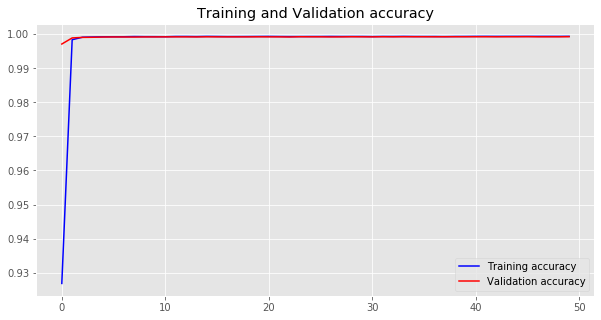

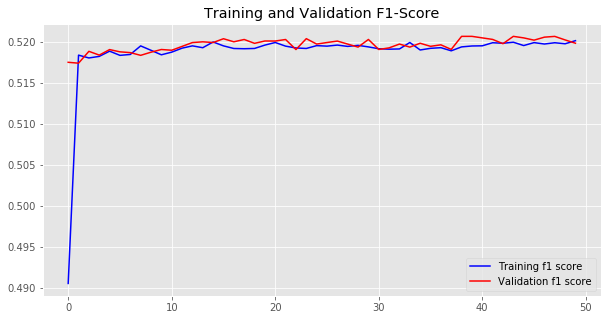

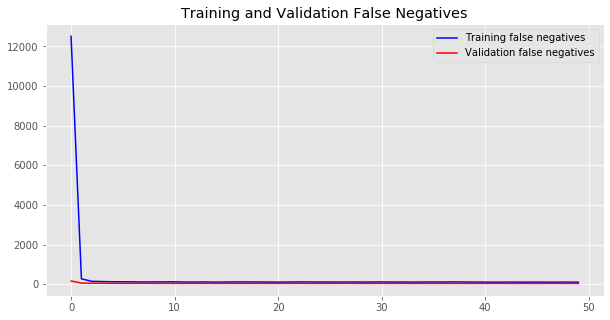

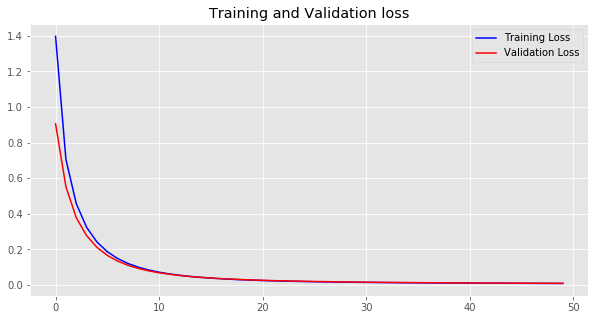

In [28]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
f1_list = history.history['f1']
val_f1_list = history.history['val_f1']
false_negative_list = (history.history['false_negatives'])
val_false_negative_list = (history.history['val_false_negatives'])
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, f1_list, 'b', label='Training f1 score')
plt.plot(epochs, val_f1_list, 'r', label='Validation f1 score')
plt.title('Training and Validation F1-Score')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, false_negative_list, 'b', label='Training false negatives')
plt.plot(epochs, val_false_negative_list, 'r', label='Validation false negatives')
plt.title('Training and Validation False Negatives')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

**Please let me know your thoughts and suggestions!** 

**Thank you**

**Rodrigo**